# Project: Analyzing Historical Stock/Revenue Data and Building a Dashboard
## Extracting and Visualizing Stock and Revenue Data for Tesla and GameStop

In [4]:
!pip install yfinance
#!pip install pandas
#!pip install requests
!pip install bs4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.5/939.5 kB 72.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.1/101.1 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 91.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 108.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 90.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 39.6 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.7-py3-none-any.whl size=138905 sha256=b95c92c9ada43bb73489a6a481113a

In [29]:
#Import Libraries
import yfinance as yf
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import requests
from bs4 import BeautifulSoup


In [24]:
#Defining graphs
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

### Question 1: Use yfinance to Extract Stock Data from Tesla

In [12]:
tesla= yf.Ticker("TSLA")
tesla_data=tesla.history(period="max")
# Display the first five rows of the downloaded data
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


###  Question 2: Use Webscraping to Extract Tesla Revenue Data

In [65]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
response = requests.get(url, headers=headers)
soup = BeautifulSoup(html_data, "html.parser")
# Crear el DataFrame vacío
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
# Buscar todas las tablas
tables = soup.find_all('table')
# Recorrer las tablas para encontrar la que contiene "Quarterly Revenue"
for table in tables:
    # Verificar si la tabla tiene un encabezado que contenga "Quarterly Revenue"
    if "Quarterly Revenue" in table.text:
        # Encontrar todas las filas de la tabla
        rows = table.find_all('tr')
        # Recorrer cada fila para extraer los datos
        for row in rows[1:]:  # Ignorar la primera fila que es el encabezado
            col = row.find_all('td')
            # Si la fila tiene columnas, extraer los datos
            if col:
                date = col[0].text.strip()
                revenue = col[1].text.strip().replace(',', '').replace('$', '')

                # Añadir la fila al DataFrame
                tesla_revenue = pd.concat([tesla_revenue, 
                                           pd.DataFrame({"Date": [date], "Revenue": [revenue]})], 
                                          ignore_index=True)
        break
# Limpiar el DataFrame
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(float)  # Convertir a tipo numérico
# Mostrar las últimas 5 filas del DataFrame
print(tesla_revenue.tail(5))

          Date  Revenue
56  2010-09-30     31.0
57  2010-06-30     28.0
58  2010-03-31     21.0
60  2009-09-30     46.0
61  2009-06-30     27.0


### Question 3: Use yfinance to Extract Stock Data from GameStop

In [49]:
gmestop=yf.Ticker("GME")
gme_data=gmestop.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


### Question 4: Use Webscraping to Extract GameStop Revenue Data

In [72]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
soup = BeautifulSoup(html_data, "html.parser")
# Crear el DataFrame vacío
gme_revenue_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
# Buscar todas las tablas
tables = soup.find_all('table')
# Recorrer las tablas para encontrar la que contiene "Quarterly Revenue"
for table in tables:
    # Verificar si la tabla tiene un encabezado que contenga "Quarterly Revenue"
    if "Quarterly Revenue" in table.text:
        # Encontrar todas las filas de la tabla
        rows = table.find_all('tr')
        # Recorrer cada fila para extraer los datos
        for row in rows[1:]:  # Ignorar la primera fila que es el encabezado
            col = row.find_all('td')
            # Si la fila tiene columnas, extraer los datos
            if col:
                date = col[0].text.strip()
                revenue = col[1].text.strip().replace(',', '').replace('$', '')
                # Añadir la fila al DataFrame
                gme_revenue = pd.concat([gamestop_revenue, 
                                               pd.DataFrame({"Date": [date], "Revenue": [revenue]})], 
                                              ignore_index=True)
        break
# Limpiar el DataFrame
gme_revenue.dropna(inplace=True)
gme_revenue = gamestop_revenue[gamestop_revenue['Revenue'] != ""]
gme_revenue["Revenue"] = gamestop_revenue["Revenue"].astype(float)  # Convertir a tipo numérico
# Mostrar las últimas 5 filas del DataFrame
print(gme_revenue.tail(5))

          Date  Revenue
58  2010-01-31   3524.0
59  2009-10-31   1835.0
60  2009-07-31   1739.0
61  2009-04-30   1981.0
62  2009-01-31   3492.0


### Question 5: Plot Tesla Stock Graph

/tmp/ipykernel_331/3756985551.py:4: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/tmp/ipykernel_331/3756985551.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



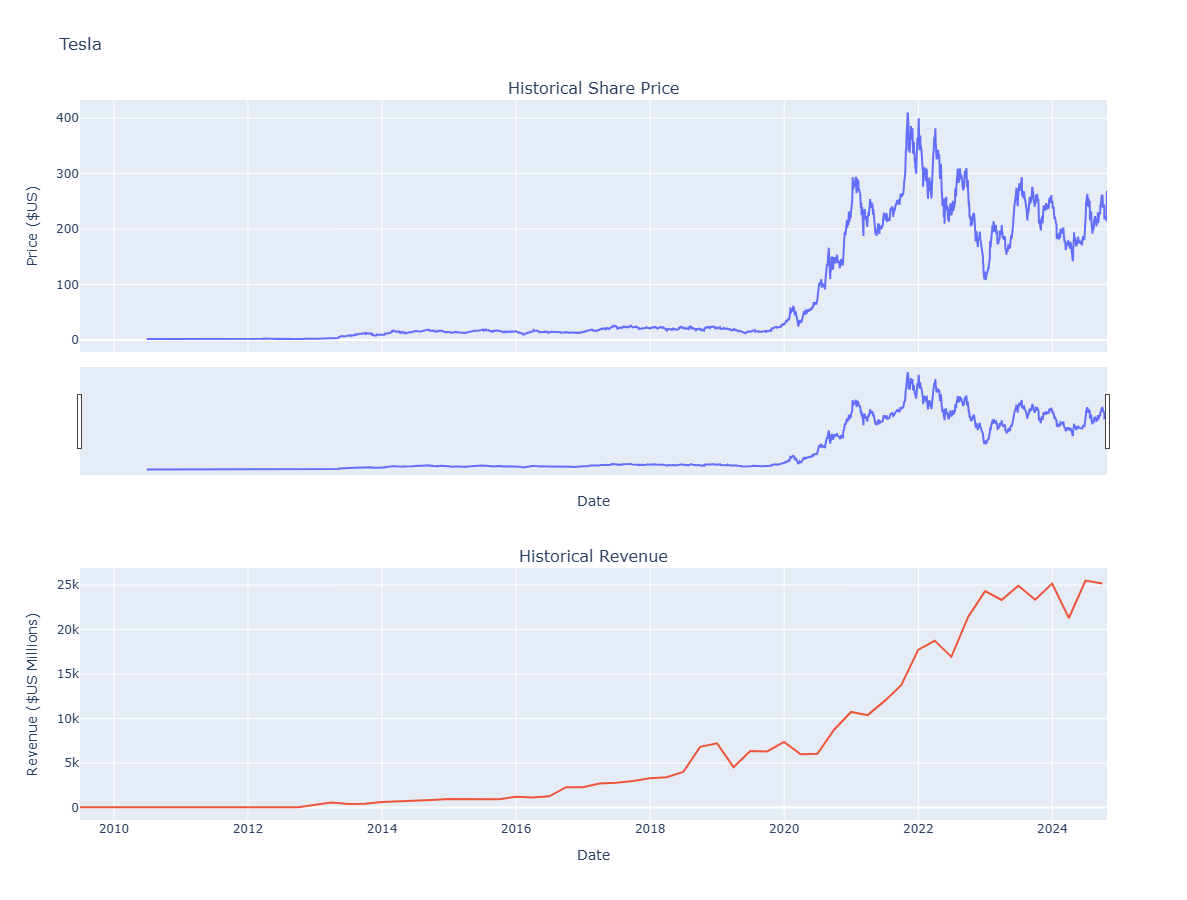

In [70]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)
make_graph(tesla_data,tesla_revenue,'Tesla')

### Question 6: Plot GameStop Stock Graph

/tmp/ipykernel_331/3756985551.py:4: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/tmp/ipykernel_331/3756985551.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



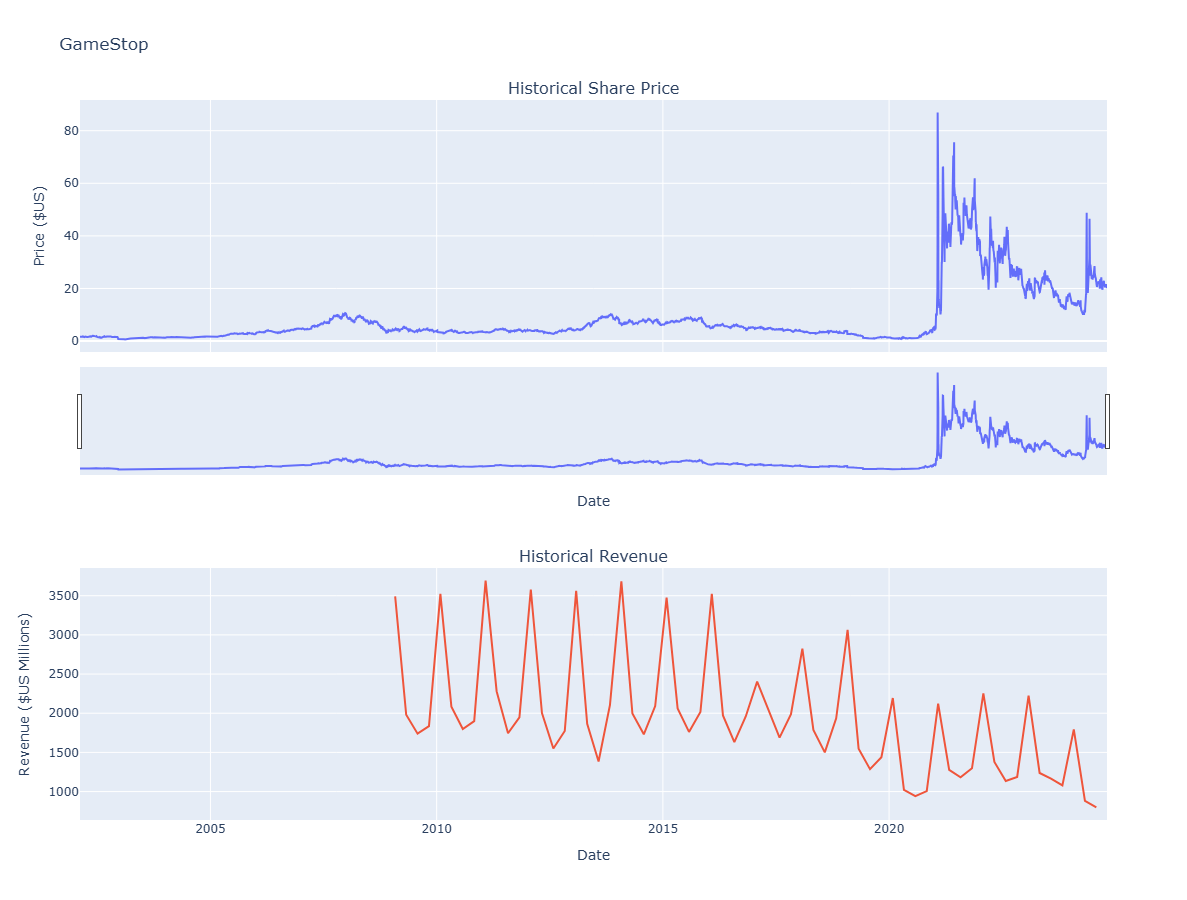

In [73]:
make_graph(gme_data,gme_revenue,'GameStop')